In [15]:
import pandas as pd
import ta

In [16]:
data=pd.read_csv('../data/processed/crypto_data.csv')
data.head() 

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,num_trades,taker_base_volume,taker_quote_volume
0,2023-02-25,23184.04,23219.13,22722.00,23157.07,191311.81010,2023-02-25 23:59:59.999,4.406286e+09,9124568,94440.13964,2.175284e+09
1,2023-02-26,23157.07,23689.99,23059.18,23554.85,202323.73623,2023-02-26 23:59:59.999,4.716158e+09,9506015,101003.39278,2.354572e+09
2,2023-02-27,23554.85,23897.99,23106.77,23492.09,283706.08590,2023-02-27 23:59:59.999,6.659786e+09,11754195,141360.04845,3.318354e+09
3,2023-02-28,23492.09,23600.00,23020.97,23141.57,264140.99894,2023-02-28 23:59:59.999,6.172931e+09,9568743,131200.82704,3.066250e+09
4,2023-03-01,23141.57,24000.00,23020.03,23628.97,315287.41737,2023-03-01 23:59:59.999,7.441571e+09,9390487,157961.92667,3.728257e+09


In [17]:
#check 1 day returns
data['1_day_return'] = data['close'].pct_change(periods=1)
data[['close','1_day_return']].head(10)

,close,1_day_return
0,23157.07,NaN
1,23554.85,0.017177
2,23492.09,-0.002664
3,23141.57,-0.014921
4,23628.97,0.021062
5,23465.32,-0.006926
6,22354.34,-0.047346
7,22346.57,-0.000348
8,22430.24,0.003744
9,22410.00,-0.000902


In [18]:
# checking the rolling volatility
data['7_day_volatility'] = data['1_day_return'].rolling(window=7).std()
data[['1_day_return', '7_day_volatility']].tail(10)

,1_day_return,7_day_volatility
990,-0.027847,0.022647
991,-0.013629,0.021178
992,-0.019304,0.020382
993,-0.051138,0.024824
994,0.010595,0.026316
995,-0.013963,0.021956
996,-0.021709,0.018468
997,0.008086,0.020649
998,-0.015123,0.020647
999,0.003371,0.021554


In [19]:
data['1_day_volatility'] = data['1_day_return'].rolling(window=24).std()
data[['1_day_return', '1_day_volatility']].tail()


,1_day_return,1_day_volatility
995,-0.013963,0.022077
996,-0.021709,0.022066
997,0.008086,0.022131
998,-0.015123,0.020992
999,0.003371,0.021123


In [20]:
### **2. Technical Indicators**

#Using `ta` or `ta-lib`:

# RSI\
 #MACD\
 #Moving averages (SMA20, SMA50, SMA200)\
 #Bollinger Bands\
 #Stochastic Oscillator
data['rsi'] = ta.momentum.RSIIndicator(data['close']).rsi()
data['macd'] = ta.trend.MACD(data['close']).macd()
data['sma20'] = ta.trend.SMAIndicator(data['close'], window=20).sma_indicator()
data['sma50'] = ta.trend.SMAIndicator(data['close'], window=50).sma_indicator()
data['sma200'] = ta.trend.SMAIndicator(data['close'], window=200).sma_indicator()
bb_indicator = ta.volatility.BollingerBands(data['close'])
data['bb_high'] = bb_indicator.bollinger_hband()
data['bb_low'] = bb_indicator.bollinger_lband()
data['stochastic_oscillator'] = ta.momentum.StochasticOscillator(data['high'], data['low'], data['close']).stoch()
data.tail()

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,num_trades,taker_base_volume,...,7_day_volatility,1_day_volatility,rsi,macd,sma20,sma50,sma200,bb_high,bb_low,stochastic_oscillator
995,2025-11-16,95596.23,96635.11,93005.55,94261.44,23889.40510,2025-11-16 23:59:59.999,2.261296e+09,5141394,10828.62752,...,0.021956,0.022077,31.029154,-3896.543200,104002.2020,110286.8176,110444.91680,114511.886795,93492.517205,7.077650
996,2025-11-17,94261.45,96043.00,91220.00,92215.14,39218.59806,2025-11-17 23:59:59.999,3.674562e+09,8134322,18690.19245,...,0.018468,0.022066,28.830303,-4256.195101,102968.0365,109887.8414,110423.54295,113836.973973,92099.099027,6.112654
997,2025-11-18,92215.14,93836.01,89253.78,92960.83,39835.14769,2025-11-18 23:59:59.999,3.641033e+09,8786593,20130.95957,...,0.020649,0.022131,30.755973,-4429.984767,102115.0135,109460.8188,110403.91140,113308.867538,90921.159462,20.316811
998,2025-11-19,92960.83,92980.22,88608.00,91554.96,32286.63760,2025-11-19 23:59:59.999,2.925774e+09,6822174,15060.08451,...,0.020647,0.020992,29.154345,-4627.809778,101276.6175,109010.9394,110382.40410,112984.997469,89568.237531,15.598984
999,2025-11-20,91554.96,93160.00,91185.26,91863.55,11227.11465,2025-11-20 23:59:59.999,1.035375e+09,2246475,5472.35717,...,0.021554,0.021123,30.015841,-4705.445444,100389.3945,108476.3106,110370.33375,112127.207356,88651.581644,17.232426


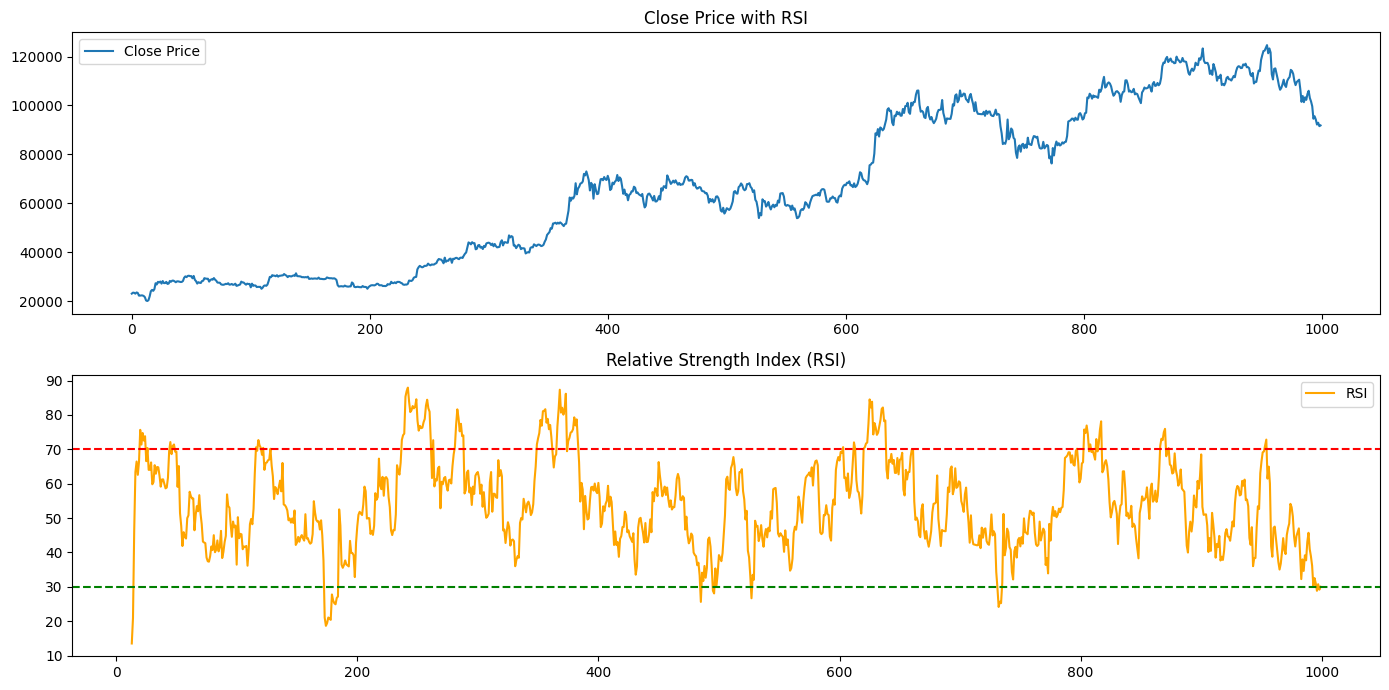

In [21]:
#visualize the features of rsi
import matplotlib.pyplot as plt
plt.figure(figsize=(14,7))
plt.subplot(2,1,1)
plt.plot(data['close'], label='Close Price')
plt.title('Close Price with RSI')
plt.legend()
plt.subplot(2,1,2)
plt.plot(data['rsi'], label='RSI', color='orange')
plt.axhline(70, color='red', linestyle='--')
plt.axhline(30, color='green', linestyle='--')
plt.title('Relative Strength Index (RSI)')
plt.legend()
plt.tight_layout()
plt.show()


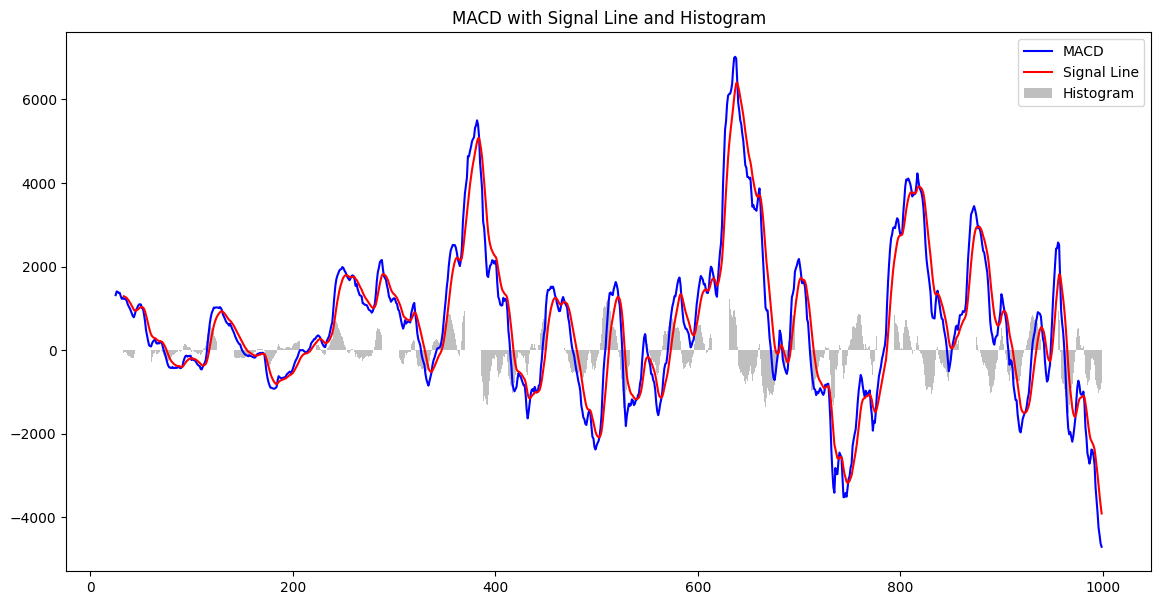

In [22]:
#plot macd with signal and histogram
plt.figure(figsize=(14,7))
plt.plot(data['macd'], label='MACD', color='blue')
macd_full = ta.trend.MACD(data['close'])
plt.plot(macd_full.macd_signal(), label='Signal Line', color='red')
plt.bar(data.index, macd_full.macd_diff(), label='Histogram', color='gray', alpha=0.5)
plt.title('MACD with Signal Line and Histogram')
plt.legend()
plt.show()

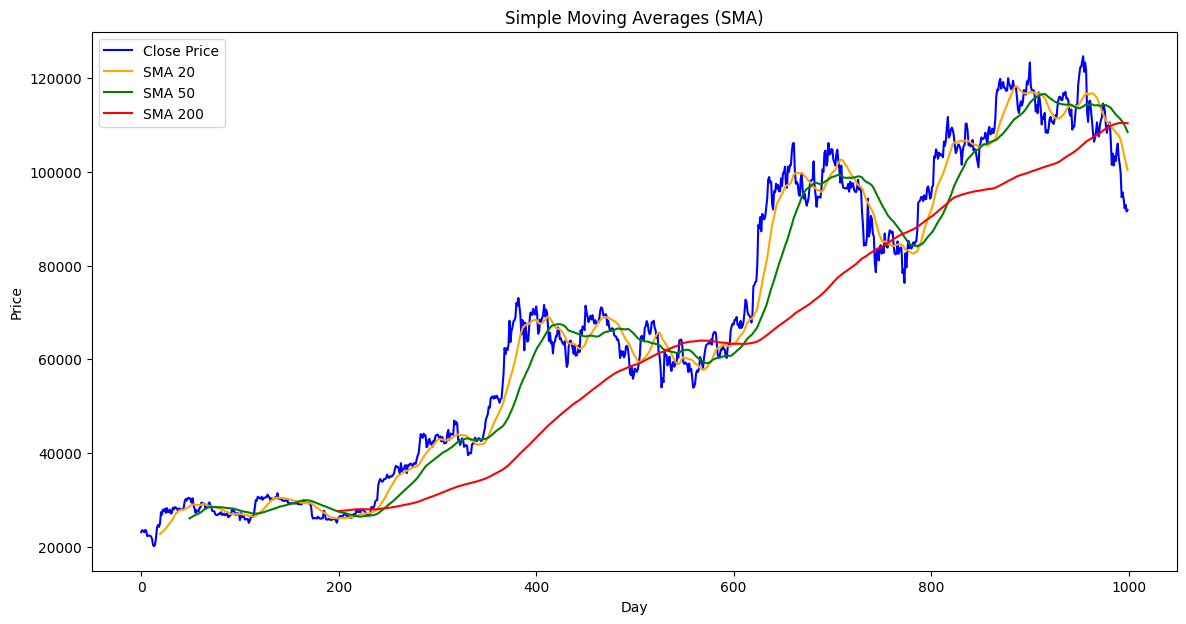

In [23]:
# Visualize the sma20, sma50, sma200 features
plt.figure(figsize=(14,7))
plt.plot(data['close'], label='Close Price', color='blue')  
plt.plot(data['sma20'], label='SMA 20', color='orange')
plt.plot(data['sma50'], label='SMA 50', color='green')
plt.plot(data['sma200'], label='SMA 200', color='red')
plt.title('Simple Moving Averages (SMA)')
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.show()

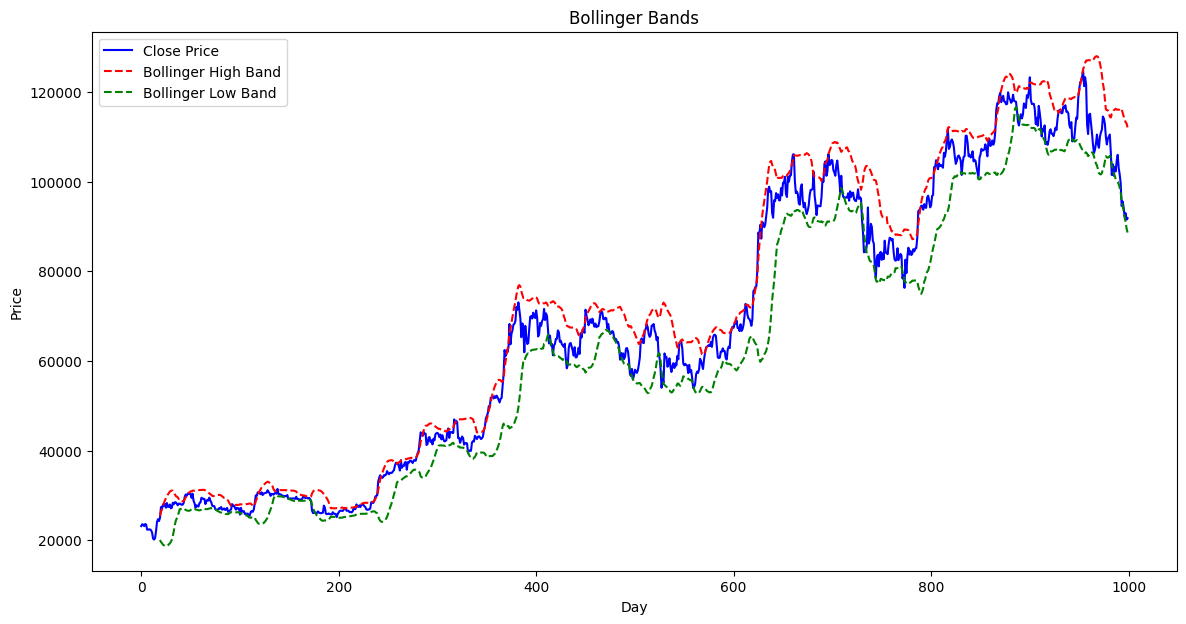

In [24]:
# visualize the bollinger bands
plt.figure(figsize=(14,7))
plt.plot(data['close'], label='Close Price', color='blue')
plt.plot(data['bb_high'], label='Bollinger High Band', color='red', linestyle='--')
plt.plot(data['bb_low'], label='Bollinger Low Band', color='green', linestyle='--')
plt.title('Bollinger Bands')   
plt.xlabel('Day')
plt.ylabel('Price')
plt.legend()
plt.show()

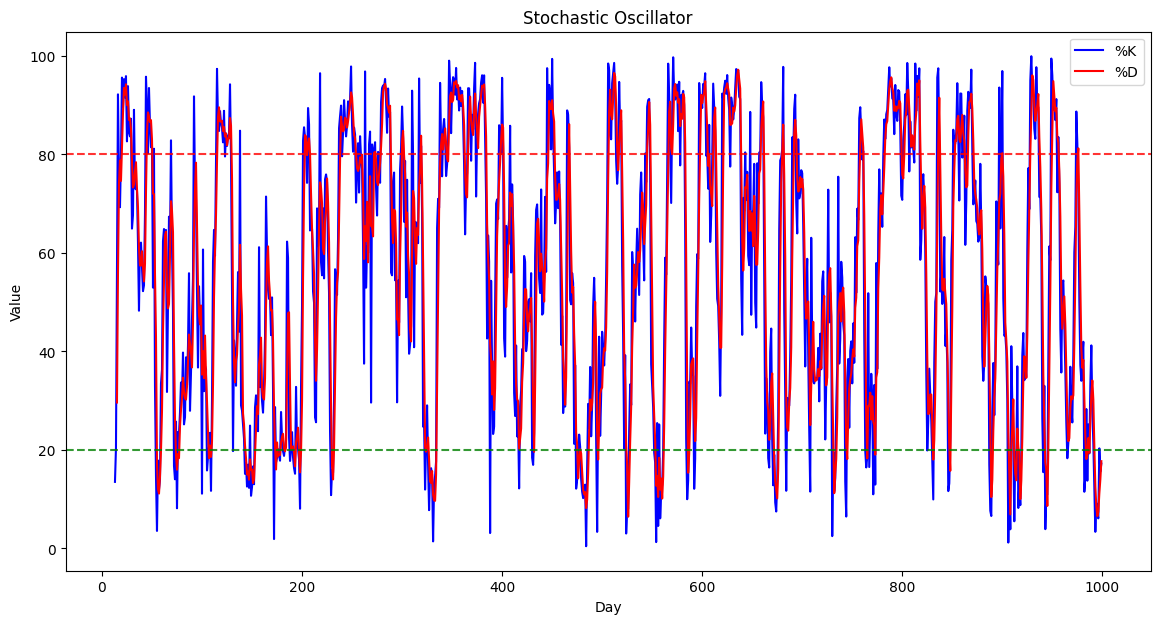

In [25]:
#visualize the stochastic oscillator with %k and %d
plt.figure(figsize=(14,7))
plt.plot(data['stochastic_oscillator'], label='%K', color='blue') 
stoch = ta.momentum.StochasticOscillator(data['high'], data['low'], data['close'])
plt.plot(stoch.stoch_signal(), label='%D', color='red')
plt.axhline(80, color='red', linestyle='--', alpha=0.8)
plt.axhline(20, color='green', linestyle='--', alpha=0.8)
plt.title('Stochastic Oscillator')
plt.xlabel('Day')
plt.ylabel('Value')
plt.legend()
plt.show()

In [ ]:
data["open_time"] = pd.to_datetime(data["open_time"], unit='ms')
data["close_time"] = pd.to_datetime(data["close_time"], unit='ms')
data["close"] = data["close"].astype(float)
data.head()

In [26]:
#dropping NaN values
data= data.dropna().reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   open_time              801 non-null    object 
 1   open                   801 non-null    float64
 2   high                   801 non-null    float64
 3   low                    801 non-null    float64
 4   close                  801 non-null    float64
 5   volume                 801 non-null    float64
 6   close_time             801 non-null    object 
 7   quote_asset_volume     801 non-null    float64
 8   num_trades             801 non-null    int64  
 9   taker_base_volume      801 non-null    float64
 10  taker_quote_volume     801 non-null    float64
 11  1_day_return           801 non-null    float64
 12  7_day_volatility       801 non-null    float64
 13  1_day_volatility       801 non-null    float64
 14  rsi                    801 non-null    float64
 15  macd  

In [27]:
#saving the new data with features and labels
data.to_csv('../data/processed/crypto_data_feature_engineered.csv', index=False)

In [28]:
df=pd.read_csv('../data/processed/crypto_data_features_labels.csv')
df.head()

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,num_trades,taker_base_volume,...,macd,sma20,sma50,sma200,bb_high,bb_low,stochastic_oscillator,future_return,label,label_name
0,2023-09-12,25162.53,26567.00,25131.48,25840.10,56434.38537,2023-09-12 23:59:59.999,1.464393e+09,1047056,27720.51830,...,-512.111919,26068.5745,27576.7890,27630.36120,27129.522592,25007.626408,32.748983,0.014779,1,HOLD
1,2023-09-13,25840.10,26405.22,25764.17,26222.00,31610.82753,2023-09-13 23:59:59.999,8.254379e+08,714880,15287.00038,...,-448.682032,26070.6720,27516.6508,27645.68585,27132.658711,25008.685289,49.171602,0.011469,1,HOLD
2,2023-09-14,26222.00,26860.49,26126.77,26522.73,38333.17250,2023-09-14 23:59:59.999,1.015267e+09,799278,19440.45467,...,-369.883209,26093.8080,27460.0662,27660.52525,27173.865049,25013.750951,82.762862,0.002913,1,HOLD
3,2023-09-15,26522.73,26888.00,26224.00,26600.00,26227.29369,2023-09-15 23:59:59.999,6.952033e+08,654094,12600.39115,...,-297.767058,26122.9395,27407.6106,27676.06480,27224.395884,25021.483116,85.505788,-0.001516,1,HOLD
4,2023-09-16,26599.99,26777.00,26445.00,26559.67,13960.93351,2023-09-16 23:59:59.999,3.708899e+08,526416,6508.91352,...,-241.089650,26145.8345,27352.5212,27693.15530,27263.495682,25028.173318,83.476095,-0.001211,1,HOLD
